# **Case Study 01 Sales Force Training**

In [ ]:
import pandas as pd
from scipy import stats

data = [
    100, 150, 50, 100, 130, 120, 100, 85, 70, 150,
    150, 120, 50, 100, 100, 140, 90, 150, 50, 90,
    120, 100, 110, 75, 65
]

df = pd.DataFrame(data, columns=['TransactionAmount'])
df

,TransactionAmount
0,100
1,150
2,50
3,100
4,130
5,120
6,100
7,85
8,70
9,150


In [ ]:
mean_value = df['TransactionAmount'].mean()
median_value = df['TransactionAmount'].median()
mode_value = df['TransactionAmount'].mode()

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value.tolist())


Mean: 102.6
Median: 100.0
Mode: [100]


In [ ]:
range_value = df['TransactionAmount'].max() - df['TransactionAmount'].min()
variance_value = df['TransactionAmount'].var()
std_dev_value = df['TransactionAmount'].std()

print("Range:", range_value)
print("Variance:", variance_value)
print("Standard Deviation:", std_dev_value)

Range: 100
Variance: 1012.7499999999997
Standard Deviation: 31.82373328193912


In [ ]:
# H0: mean = 100
# H1: mean > 100
alpha = 0.05

In [ ]:
t_stat, p_value = stats.ttest_1samp(df['TransactionAmount'], 100)

p_value_one_tailed = p_value / 2

print("T-Statistic:", t_stat)
print("P-Value (One Tailed):", p_value_one_tailed)

T-Statistic: 0.4085001556802841
P-Value (One Tailed): 0.34326424067190586


In [ ]:
if p_value_one_tailed < alpha:
    print("Tolak H0: rata-rata transaksi meningkat secara signifikan")
else:
    print("Gagal menolak H0: peningkatan tidak signifikan")

Gagal menolak H0: peningkatan tidak signifikan


Berdasarkan hasil pengujian statistik menggunakan One Sample T-Test dengan tingkat signifikansi (α) sebesar 5%, diperoleh nilai p-value sebesar 0,343 yang lebih besar dari nilai α (0,05). Oleh karena itu, hipotesis nol (H0) gagal ditolak.

Hal ini menunjukkan bahwa program sales force training belum terbukti secara signifikan meningkatkan rata-rata nilai transaksi penjualan dibandingkan dengan rata-rata sebelumnya sebesar 100. Meskipun secara deskriptif terdapat kenaikan rata-rata transaksi menjadi 102,6, peningkatan tersebut belum cukup kuat secara statistik untuk menyimpulkan bahwa training memberikan dampak nyata terhadap peningkatan penjualan.

Dengan demikian, perusahaan disarankan untuk:

- Mengevaluasi kembali materi dan metode pelatihan,
- Menggunakan jumlah sampel yang lebih besar, atau melakukan pengamatan dalam - - Periode waktu yang lebih panjang

# **Case Study 02 Housing Price**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/train_house.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
cols_used = [
    'Utilities', 'HouseStyle', 'ExterQual',
    'SalePrice', 'GrLivArea', 'PoolArea', 'GarageArea'
]

df = df[cols_used].dropna()

In [ ]:
print(df.shape)

(1460, 7)


In [ ]:
df

,Utilities,HouseStyle,ExterQual,SalePrice,GrLivArea,PoolArea,GarageArea
0,AllPub,2Story,Gd,208500,1710,0,548
1,AllPub,1Story,TA,181500,1262,0,460
2,AllPub,2Story,Gd,223500,1786,0,608
3,AllPub,2Story,TA,140000,1717,0,642
4,AllPub,2Story,Gd,250000,2198,0,836
...,...,...,...,...,...,...,...
1455,AllPub,2Story,TA,175000,1647,0,460
1456,AllPub,1Story,TA,210000,2073,0,500
1457,AllPub,2Story,Ex,266500,2340,0,252
1458,AllPub,1Story,TA,142125,1078,0,240


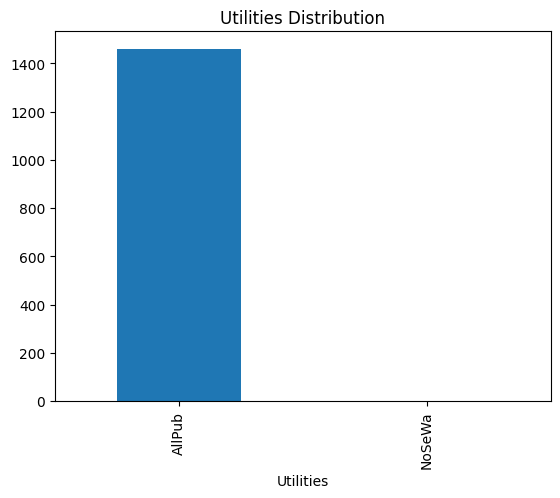

In [ ]:
df['Utilities'].value_counts().plot(kind='bar')
plt.title('Utilities Distribution')
plt.show()


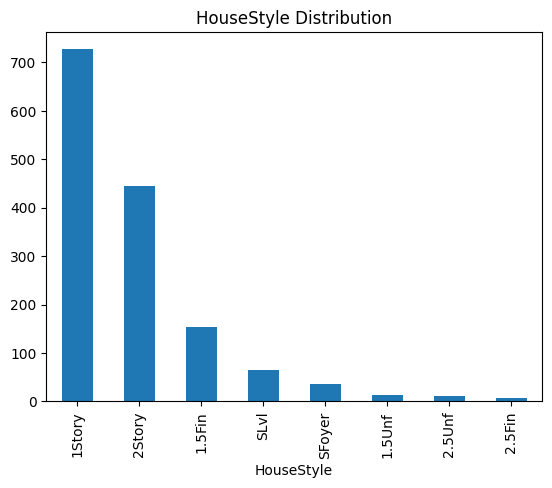

In [ ]:
df['HouseStyle'].value_counts().plot(kind='bar')
plt.title('HouseStyle Distribution')
plt.show()


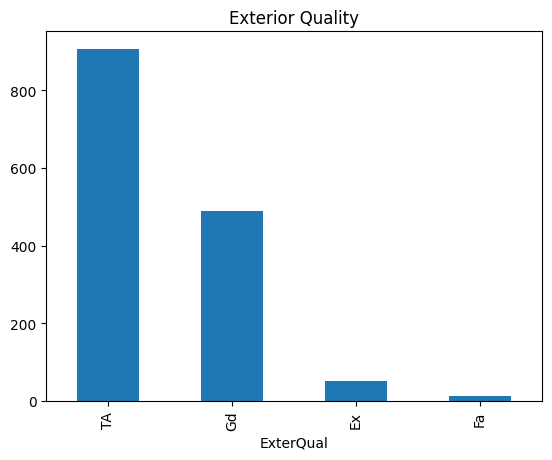

In [ ]:
df['ExterQual'].value_counts().plot(kind='bar')
plt.title('Exterior Quality')
plt.show()


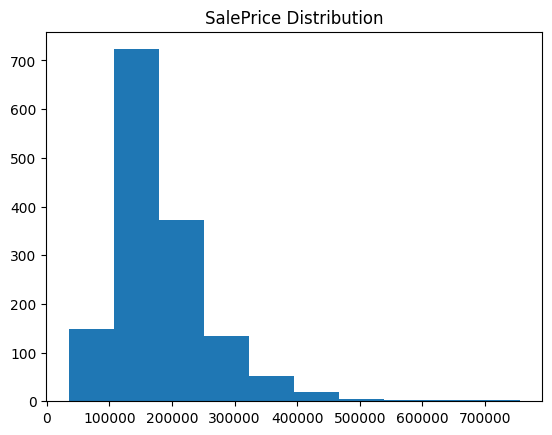

In [ ]:
plt.hist(df['SalePrice'])
plt.title('SalePrice Distribution')
plt.show()


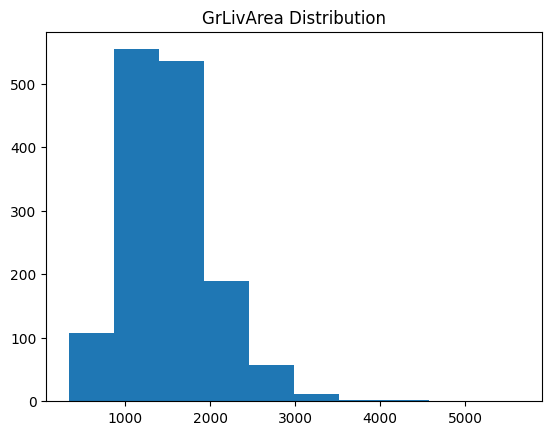

In [ ]:
plt.hist(df['GrLivArea'])
plt.title('GrLivArea Distribution')
plt.show()


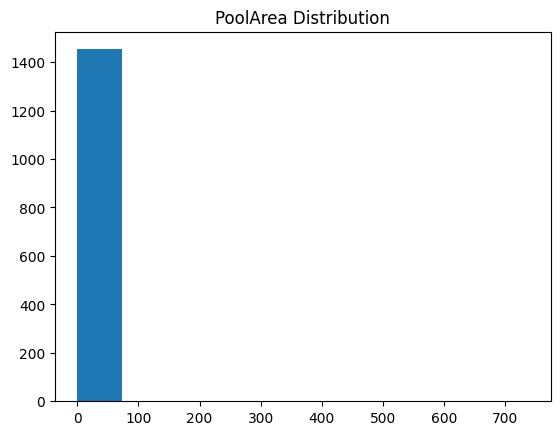

In [ ]:
plt.hist(df['PoolArea'])
plt.title('PoolArea Distribution')
plt.show()

In [ ]:
df['LogSalePrice'] = np.log10(df['SalePrice'])
df['LogGrLivArea'] = np.log10(df['GrLivArea'] + 1)
df['LogPoolArea'] = np.log10(df['PoolArea'] + 1)

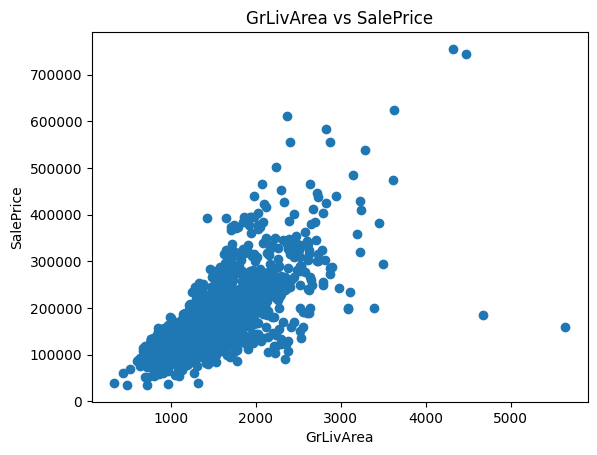

In [ ]:
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

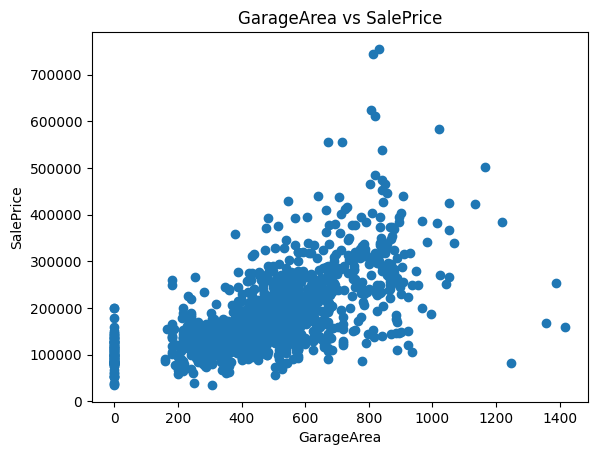

In [ ]:
plt.scatter(df['GarageArea'], df['SalePrice'])
plt.title('GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

# **Case Study 03 Customer Churn Prediction**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve)

In [ ]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
print(f"\nJumlah Missing Values di TotalCharges: {df['TotalCharges'].isnull().sum()}")


Jumlah Missing Values di TotalCharges: 11


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.drop(columns=['customerID'], inplace=True)

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df = pd.get_dummies(df, drop_first=True)

print("\nDimensi Data Setelah Preprocessing:", df.shape)


Dimensi Data Setelah Preprocessing: (7032, 31)


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split Data (80% Train, 20% Test) dengan Stratify agar proporsi churn seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

HASIL EVALUASI LOGISTIC REGRESSION
Accuracy: 0.8038379530916845

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC-AUC Score: 0.8356727976766699


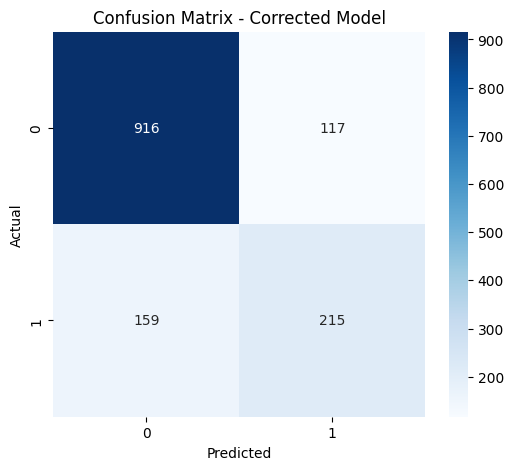

In [ ]:
print("HASIL EVALUASI LOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Corrected Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

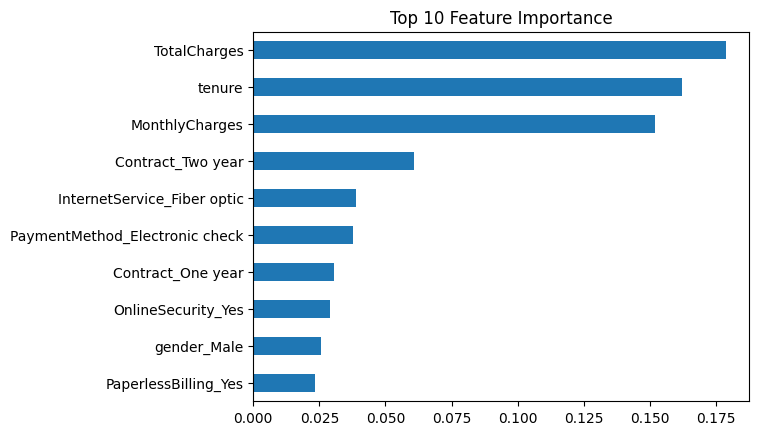

In [ ]:
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importance")
plt.gca().invert_yaxis()
plt.show()